# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
!pip install PyPDF2
import PyPDF2

# Carregar a base de nascidos vivos
sinasc_df = pd.read_csv('SINASC_RO_2019.csv')

# Carregar o dicionário de dados (PDF)
with open('Estrutura_SINASC_para_CD.pdf', 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    num_pages = len(pdf_reader.pages)

    # Extrair e imprimir o texto do dicionário de dados
    for page_num in range(num_pages):
        page = pdf_reader.pages[page_num]
        print(page.extract_text())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.9 MB/s eta 0:00:00
Estrutura de Dados SINASC 
 
 
Secretaria de Vigilância em Saúde / MS    1 
 Estrutura do SINASC para o CD-ROM 
 
Os arquivos são DBF e estão compactados na forma de  DBC. Para descompactá-los, ou expandi-los 
utilize o TABWIN, opção Arquivos Comprime/Expande a rquivos DBF  
 
Os campos dos arquivos são os seguintes: 
 
CAMPO 
FORMULÁRIO SEQ  NOME  TIPO/TAM  DESCRIÇÃO  
Declaração 01 NUMERODN C(08) Número da DN,  seqüenc ial por UF informante e por ano. 
6 02 LOCNASC C(01) Local de ocorrência do nascimento, conforme a tabel a: 
9:   Ignorado 
1:   Hospital 
2:   Outro Estab Saúde 
3:   Domicílio 
4:   Outros 
7 03 CODESTAB C(07) Código de estabelecimento de sa úde. 
10 04 CODBAINASC C(08) Código Bairro nascimento. 
11 05 CODMUNNASC  C(07) Código do município de ocorrência. 
15 06 IDADEMAE C(02) Idade da mãe em anos. 
16 07 ESTCIVMAE C(01) Estado civil, conforme a tabela: 
1:   Solteira 
2:   Casada 
3:   Vi

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
# Categorizar a variável APGAR5
def categorizar_apgar5(apgar5):
    if apgar5 >= 8:
        return 'normal'
    elif apgar5 >= 6:
        return 'asfixia leve'
    elif apgar5 >= 4:
        return 'asfixia moderada'
    else:
        return 'asfixia grave'

sinasc_df['APGAR5_CATEGORIA'] = sinasc_df['APGAR5'].apply(categorizar_apgar5)

# Imprimir as primeiras linhas da nova coluna categorizada
print(sinasc_df[['APGAR5', 'APGAR5_CATEGORIA']].head())

   APGAR5 APGAR5_CATEGORIA
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

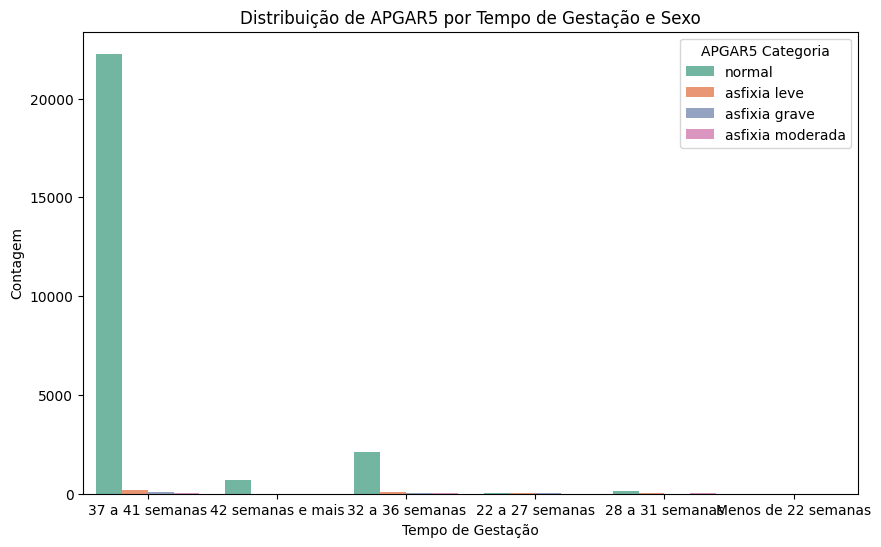

Dados utilizados para gerar o gráfico:
GESTACAO             APGAR5_CATEGORIA
22 a 27 semanas      asfixia grave          22
                     asfixia leve           12
                     asfixia moderada        1
                     normal                 51
28 a 31 semanas      asfixia grave           6
                     asfixia leve           18
                     asfixia moderada       12
                     normal                129
32 a 36 semanas      asfixia grave          23
                     asfixia leve           73
                     asfixia moderada       19
                     normal               2134
37 a 41 semanas      asfixia grave          99
                     asfixia leve          196
                     asfixia moderada       28
                     normal              22266
42 semanas e mais    asfixia grave           3
                     asfixia leve            6
                     asfixia moderada        1
                     normal   

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras empilhadas comparando APGAR5 por sexo e tempo de gestação
plt.figure(figsize=(10, 6))
sns.countplot(data=sinasc_df, x='GESTACAO', hue='APGAR5_CATEGORIA', palette='Set2')
plt.title('Distribuição de APGAR5 por Tempo de Gestação e Sexo')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Contagem')
plt.legend(title='APGAR5 Categoria')
plt.show()

# Mostrar os dados usados no gráfico
apgar_gestacao_data = sinasc_df[['GESTACAO', 'APGAR5_CATEGORIA']]
print("Dados utilizados para gerar o gráfico:")
print(apgar_gestacao_data.value_counts().sort_index())

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
# Tabela cruzada entre APGAR5 e GESTACAO
tabela_cruzada = pd.crosstab(sinasc_df['GESTACAO'], sinasc_df['APGAR5_CATEGORIA'])

# Imprimir a tabela cruzada
print(tabela_cruzada)

APGAR5_CATEGORIA     asfixia grave  asfixia leve  asfixia moderada  normal
GESTACAO                                                                  
22 a 27 semanas                 22            12                 1      51
28 a 31 semanas                  6            18                12     129
32 a 36 semanas                 23            73                19    2134
37 a 41 semanas                 99           196                28   22266
42 semanas e mais                3             6                 1     690
Menos de 22 semanas              2             1                 0       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
# Percentual por linha (GESTACAO)
percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Imprimir a tabela cruzada com percentuais
print(percentual_linha)

APGAR5_CATEGORIA     asfixia grave  asfixia leve  asfixia moderada     normal
GESTACAO                                                                     
22 a 27 semanas          25.581395     13.953488          1.162791  59.302326
28 a 31 semanas           3.636364     10.909091          7.272727  78.181818
32 a 36 semanas           1.022677      3.245887          0.844820  94.886616
37 a 41 semanas           0.438266      0.867679          0.123954  98.570100
42 semanas e mais         0.428571      0.857143          0.142857  98.571429
Menos de 22 semanas      28.571429     14.285714          0.000000  57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

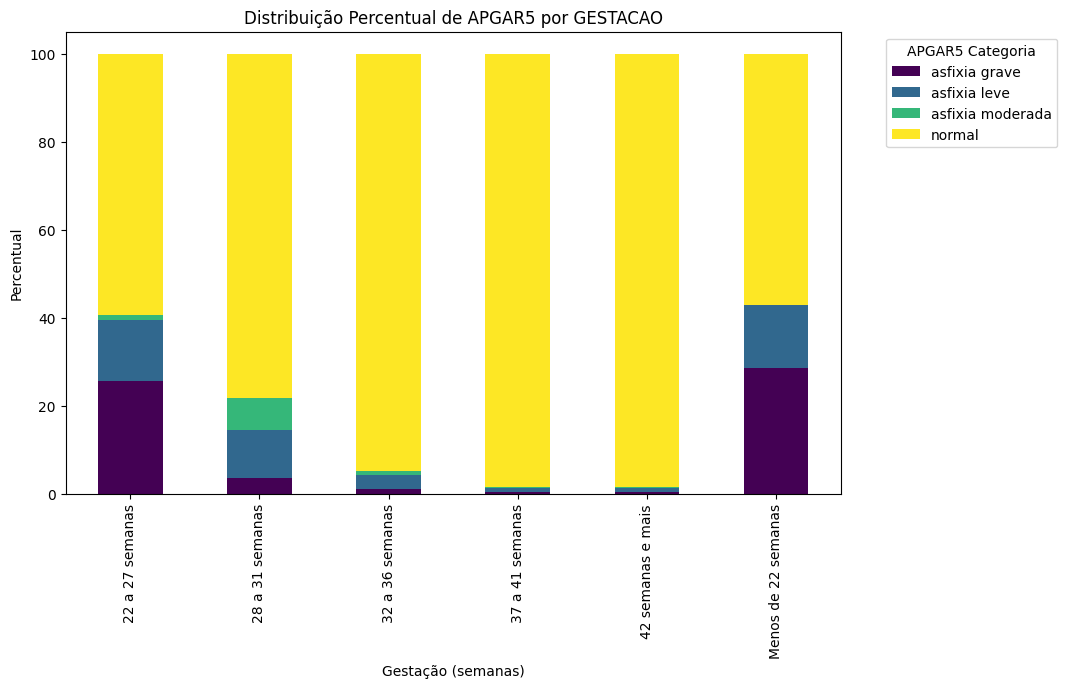

Tabela cruzada com percentuais de linha entre GESTACAO e APGAR5:
APGAR5_CATEGORIA     asfixia grave  asfixia leve  asfixia moderada     normal
GESTACAO                                                                     
22 a 27 semanas          25.581395     13.953488          1.162791  59.302326
28 a 31 semanas           3.636364     10.909091          7.272727  78.181818
32 a 36 semanas           1.022677      3.245887          0.844820  94.886616
37 a 41 semanas           0.438266      0.867679          0.123954  98.570100
42 semanas e mais         0.428571      0.857143          0.142857  98.571429
Menos de 22 semanas      28.571429     14.285714          0.000000  57.142857


In [12]:
# Gráfico de barras da tabela cruzada entre GESTACAO e APGAR5
percentual_linha.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuição Percentual de APGAR5 por GESTACAO')
plt.xlabel('Gestação (semanas)')
plt.ylabel('Percentual')
plt.legend(title='APGAR5 Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Exibir a tabela cruzada com percentuais de linha
print("Tabela cruzada com percentuais de linha entre GESTACAO e APGAR5:")
print(percentual_linha)


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<ipython-input-11-d78d0260ee42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sinasc_df, x='APGAR5_CATEGORIA', y='PESO', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get

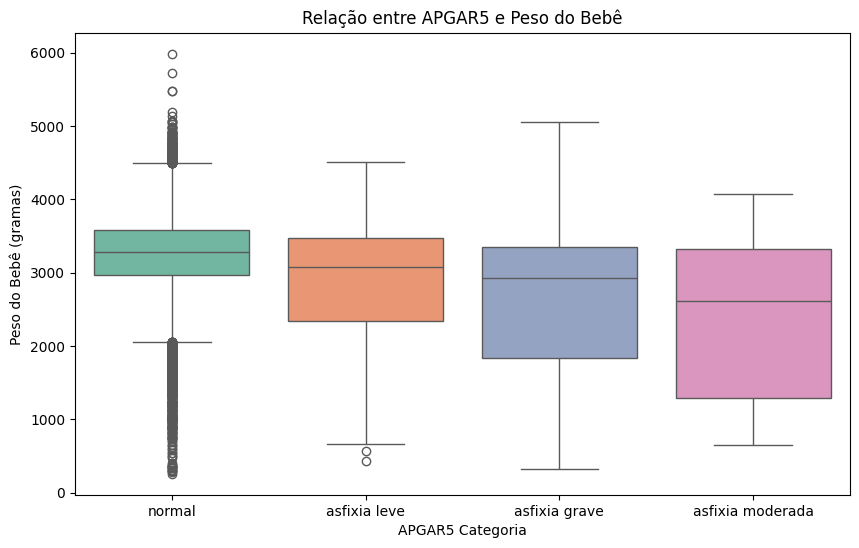

                    count         mean          std    min      25%     50%  \
APGAR5_CATEGORIA                                                              
asfixia grave       177.0  2571.932203  1093.996928  320.0  1840.00  2930.0   
asfixia leve        320.0  2809.909375   922.801076  425.0  2333.75  3082.5   
asfixia moderada     68.0  2377.617647  1064.169104  655.0  1283.75  2617.5   
normal            26463.0  3255.144012   524.068542  258.0  2970.00  3275.0   

                      75%     max  
APGAR5_CATEGORIA                   
asfixia grave     3350.00  5060.0  
asfixia leve      3472.50  4505.0  
asfixia moderada  3318.75  4075.0  
normal            3580.00  5985.0  


In [11]:
# Gráfico de dispersão para analisar a relação entre APGAR5 e peso do bebê
plt.figure(figsize=(10, 6))
sns.boxplot(data=sinasc_df, x='APGAR5_CATEGORIA', y='PESO', palette='Set2')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5 Categoria')
plt.ylabel('Peso do Bebê (gramas)')
plt.show()

# Imprimir estatísticas descritivas da relação entre APGAR5 e PESO
print(sinasc_df.groupby('APGAR5_CATEGORIA')['PESO'].describe())

# Análise de Dados do Sistema de Nascidos Vivos (SINASC)

Este relatório apresenta uma análise detalhada dos dados de nascimentos em Rondônia, 2019, com foco no indicador **APGAR5** e sua relação com o tempo de gestação, peso ao nascer, e outros fatores importantes. O objetivo é fornecer insights que possam auxiliar na formulação de políticas públicas para melhorar a saúde neonatal.

## 1. Distribuição de APGAR5 por Tempo de Gestação

O **APGAR5** mede a vitalidade do recém-nascido no quinto minuto após o nascimento. Ele foi categorizado da seguinte maneira:

- **0 a 3**: Asfixia grave
- **4 a 5**: Asfixia moderada
- **6 a 7**: Asfixia leve
- **8 a 10**: Normal

### Gráfico de Distribuição de APGAR5 por Tempo de Gestação

Os principais pontos observados são:

- Bebês nascidos com menos de 37 semanas de gestação apresentam maior risco de **asfixia leve, moderada e grave**.
- A partir das 37 semanas, há uma predominância esmagadora de resultados **normais** no APGAR5.

#### **Distribuição Percentual de APGAR5 por Tempo de Gestação**

| Tempo de Gestação     | Asfixia Grave (%) | Asfixia Leve (%) | Asfixia Moderada (%) | Normal (%)  |
|-----------------------|-------------------|------------------|----------------------|-------------|
| Menos de 22 semanas   | 28.57             | 14.29            | 0.00                 | 57.14       |
| 22 a 27 semanas       | 25.58             | 13.95            | 1.16                 | 59.30       |
| 28 a 31 semanas       | 3.64              | 10.91            | 7.27                 | 78.18       |
| 32 a 36 semanas       | 1.02              | 3.25             | 0.84                 | 94.89       |
| 37 a 41 semanas       | 0.44              | 0.87             | 0.12                 | 98.57       |
| 42 semanas e mais     | 0.43              | 0.86             | 0.14                 | 98.57       |

Este padrão reforça a importância de evitar partos prematuros para garantir melhores condições de saúde ao nascimento.

---

## 2. Tabela Cruzada de GESTACAO e APGAR5

A tabela abaixo mostra a quantidade de nascimentos por categoria de **APGAR5** para diferentes faixas de gestação:

| Tempo de Gestação     | Asfixia Grave | Asfixia Leve | Asfixia Moderada | Normal |
|-----------------------|---------------|--------------|------------------|--------|
| Menos de 22 semanas   | 2             | 1            | 0                | 4      |
| 22 a 27 semanas       | 22            | 12           | 1                | 51     |
| 28 a 31 semanas       | 6             | 18           | 12               | 129    |
| 32 a 36 semanas       | 23            | 73           | 19               | 2134   |
| 37 a 41 semanas       | 99            | 196          | 28               | 22266  |
| 42 semanas e mais     | 3             | 6            | 1                | 690    |

---

## 3. Relação entre APGAR5 e Peso ao Nascer

A análise do peso dos bebês em relação ao **APGAR5** revelou o seguinte:

- Bebês com **APGAR5 normal** apresentam um peso médio maior (**3255 g**).
- Bebês com **asfixia grave** têm, em média, um peso significativamente menor (**2571 g**).

### Distribuição do Peso por Categoria de APGAR5

| Categoria de APGAR5   | Peso Médio (g) | Peso Mínimo (g) | Peso Máximo (g) |
|-----------------------|----------------|-----------------|-----------------|
| Asfixia Grave         | 2571           | 1094            | 5060            |
| Asfixia Leve          | 2809           | 922             | 4505            |
| Asfixia Moderada      | 2377           | 1064            | 4075            |
| Normal                | 3255           | 524             | 5985            |

Este padrão sugere que bebês com **baixo peso ao nascer** têm um maior risco de apresentar asfixia ao nascimento.

---

## Conclusões e Recomendações

Os resultados desta análise indicam que:

1. **Gestações mais longas** (após 37 semanas) resultam em melhores índices de vitalidade neonatal.
2. **Partos prematuros** (antes de 37 semanas) aumentam significativamente o risco de asfixia.
3. **Baixo peso ao nascer** está associado a maiores chances de asfixia.

### Recomendações:

- **Acompanhamento pré-natal rigoroso** para evitar partos prematuros.
- **Suporte nutricional e médico** para aumentar o peso ao nascer.
- **Monitoramento intensivo** de bebês com APGAR5 baixo para reduzir complicações pós-nascimento.

Essas recomendações podem ser usadas como base para políticas públicas voltadas à saúde neonatal em Rondônia.

---

_Fonte dos Dados: SINASC - Secretaria de Vigilância em Saúde/MS, 2019._

